In [1]:
pip install tensorflow==2.2.0

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=45e1627cff0e10c74693d6019c7ab0ec563348dfab79b7a2c0858f99017f5bf0
  Stored in directory: c:\users\daniel\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 1.7.0
    Uninstalling importlib-metadata-1.7.0:
      Successfully uninstalled importlib-metadata-1.7.0


In [2]:
pip install pyserial

In [3]:
import serial

In [4]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append("..")

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
import numpy as np
from glob import glob
from models import Yolov4

In [10]:
model = Yolov4(weight_path='./yolov4.weights',
               class_name_path='./class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from ./yolov4.weights


img shape:  (420, 639, 3)
# of bboxes: 1


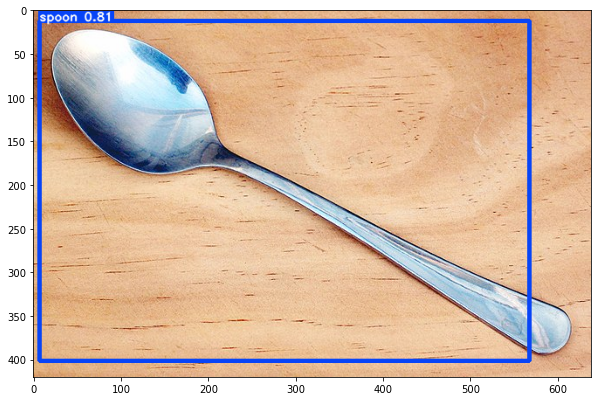

Category:  1


In [50]:
import time

result = model.predict('./img/image.jpg', random_color=True)
srl = serial.Serial('COM6', 9600, timeout=1)
time.sleep(2)
if not result.empty:
    object = result['class_name'][0]
    if object == 'spoon':
        caseNum = 1
    elif object == 'fork':
        caseNum = 2
    elif object == 'knife':
        caseNum = 3
    else:
        caseNum = 4
    
    srl.write(caseNum)
else:
    caseNum = 0

print('Category: ',caseNum)

if caseNum == 1:
    srl.write(b'1')
elif caseNum == 2:
    srl.write(b'2')
elif caseNum == 3:
    srl.write(b'3')
elif caseNum == 4:
    srl.write(b'4')

srl.close()
    
        